<a href="https://colab.research.google.com/github/StackDevPro/Data-Mining/blob/main/Adaboost_Algorithm_implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/sem2/584/ass3/hw3_train.txt', header=None)
df

,0,1,2,3,4,5,6,7,8,9,...,247,248,249,250,251,252,253,254,255,256
0,5,-1.000,-1.000,-1.000,-0.813,-0.671,-0.809,-0.887,-0.671,-0.853,...,-0.671,-0.671,-0.033,0.761,0.762,0.126,-0.095,-0.671,-0.828,-1.0
1,3,-1.000,-1.000,-1.000,-1.000,-1.000,-0.928,-0.204,0.751,0.466,...,0.466,0.639,1.000,1.000,0.791,0.439,-0.199,-0.883,-1.000,-1.0
2,3,-1.000,-1.000,-1.000,-0.830,0.442,1.000,1.000,0.479,-0.328,...,1.000,0.671,0.345,-0.507,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0
3,3,-1.000,-1.000,-1.000,-1.000,-1.000,-0.104,0.549,0.579,0.579,...,0.388,0.579,0.811,1.000,1.000,0.715,0.107,-0.526,-1.000,-1.0
4,3,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-0.107,1.000,1.000,...,-0.280,0.322,0.813,1.000,1.000,0.633,-0.144,-0.994,-1.000,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1209,3,-1.000,-0.882,-0.334,0.267,0.333,0.749,1.000,1.000,1.000,...,0.968,1.000,1.000,1.000,0.809,0.325,-0.820,-1.000,-1.000,-1.0
1210,3,-0.985,-0.048,0.226,0.226,0.226,-0.355,-0.807,-1.000,-0.726,...,-0.307,-0.555,-0.555,-0.555,-0.556,-1.000,-1.000,-1.000,-1.000,-1.0
1211,3,-1.000,-1.000,-1.000,-0.988,-0.527,-0.208,0.620,1.000,0.467,...,-0.116,0.899,0.416,-0.510,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0
1212,3,-1.000,-1.000,-1.000,-0.990,0.708,0.557,0.347,-0.107,-0.758,...,0.697,0.636,0.167,-0.968,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0


In [ ]:
df[0].replace({3:1,5:-1}, inplace= True)
df

,0,1,2,3,4,5,6,7,8,9,...,247,248,249,250,251,252,253,254,255,256
0,-1,-1.000,-1.000,-1.000,-0.813,-0.671,-0.809,-0.887,-0.671,-0.853,...,-0.671,-0.671,-0.033,0.761,0.762,0.126,-0.095,-0.671,-0.828,-1.0
1,1,-1.000,-1.000,-1.000,-1.000,-1.000,-0.928,-0.204,0.751,0.466,...,0.466,0.639,1.000,1.000,0.791,0.439,-0.199,-0.883,-1.000,-1.0
2,1,-1.000,-1.000,-1.000,-0.830,0.442,1.000,1.000,0.479,-0.328,...,1.000,0.671,0.345,-0.507,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0
3,1,-1.000,-1.000,-1.000,-1.000,-1.000,-0.104,0.549,0.579,0.579,...,0.388,0.579,0.811,1.000,1.000,0.715,0.107,-0.526,-1.000,-1.0
4,1,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-0.107,1.000,1.000,...,-0.280,0.322,0.813,1.000,1.000,0.633,-0.144,-0.994,-1.000,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1209,1,-1.000,-0.882,-0.334,0.267,0.333,0.749,1.000,1.000,1.000,...,0.968,1.000,1.000,1.000,0.809,0.325,-0.820,-1.000,-1.000,-1.0
1210,1,-0.985,-0.048,0.226,0.226,0.226,-0.355,-0.807,-1.000,-0.726,...,-0.307,-0.555,-0.555,-0.555,-0.556,-1.000,-1.000,-1.000,-1.000,-1.0
1211,1,-1.000,-1.000,-1.000,-0.988,-0.527,-0.208,0.620,1.000,0.467,...,-0.116,0.899,0.416,-0.510,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0
1212,1,-1.000,-1.000,-1.000,-0.990,0.708,0.557,0.347,-0.107,-0.758,...,0.697,0.636,0.167,-0.968,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0


In [ ]:
class DecisionStump:
    def __init__(self):
        self.pol = 1
        self.feature_idx = None
        self.threshold = None
        self.alpha = None

    def predict(self, X):
        n_samples = X.shape[0]
        X_column = X[:, self.feature_idx]
        predictions = np.ones(n_samples)
        if self.pol == 1:
            predictions[X_column < self.threshold] = -1
        else:
            predictions[X_column > self.threshold] = -1

        return predictions


class Adaboost:
    def __init__(self, n_clf=5):
        self.n_clf = n_clf
        self.clfs = []

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # Initialize weights to 1/N
        w = np.full(n_samples, (1 / n_samples))

        self.clfs = []

        
        for _ in range(self.n_clf):
            clf = DecisionStump()
            min_error = float("inf")

            
            for feature_i in range(n_features):
                X_column = X[:, feature_i]
                thresholds = np.unique(X_column)

                for threshold in thresholds:
                    # predict with polarity 1
                    p = 1
                    predictions = np.ones(n_samples)
                    predictions[X_column < threshold] = -1

                    # Error = sum of weights of misclassified samples
                    misclassified = w[y != predictions]
                    error = sum(misclassified)

                    if error > 0.5:
                        error = 1 - error
                        p = -1

                    # store the best configuration
                    if error < min_error:
                        clf.pol = p
                        clf.threshold = threshold
                        clf.feature_idx = feature_i
                        min_error = error

            # calculate alpha
            EPS = 1e-10
            clf.alpha = 0.5 * np.log((1.0 - min_error + EPS) / (min_error + EPS))

            # calculate predictions and update weights
            predictions = clf.predict(X)

            w *= np.exp(-clf.alpha * y * predictions)
            # Normalize to one
            w /= np.sum(w)

            # Save classifier
            self.clfs.append(clf)
            

    def predict(self, X):
        clf_preds = [clf.alpha * clf.predict(X) for clf in self.clfs]
        y_pred = np.sum(clf_preds, axis=0)
        y_pred = np.sign(y_pred)

        return y_pred

In [ ]:
def accuracy(y_true, y_pred):
  accuracy = np.sum(y_true == y_pred) / len(y_true)
  return accuracy

y = df[0]
df.drop(df.columns[[0]], axis = 1, inplace = True)
X = df

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [ ]:
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [ ]:
# Adaboost classification with 200 weak classifiers
clf = Adaboost(n_clf=200)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

acc = accuracy(y_test, y_pred)
print("Accuracy:", acc)

Accuracy: 0.934156378600823


In [ ]:
# Adaboost classification with 50 weak classifiers
clf = Adaboost(n_clf=50)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

acc = accuracy(y_test, y_pred)
print("Accuracy:", acc)

Accuracy: 0.8271604938271605


In [ ]:
# Adaboost classification with 0 weak classifiers
clf = Adaboost(n_clf=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

acc = accuracy(y_test, y_pred)
print("Accuracy:", acc)

Accuracy: 0.0


In [ ]:
test_df = pd.read_csv('/content/gdrive/MyDrive/sem2/584/ass3/test.txt', header=None)
test_df = test_df.to_numpy()

In [ ]:
y_pred = clf.predict(test_df)

In [ ]:
new_pred = list()
for i in y_pred:
  if i == 1:
    new_pred.append(3)
  else:
    new_pred.append(5)
print(new_pred)

In [ ]:
f = open("Simran584_3.txt", "x")

f.close()

In [ ]:
f = open("Simran584_3.txt", "a")
for i in new_pred:
  f.write(str(i))
  f.write("\n")
f.close()

In [ ]:
f = open("Simran584_3.txt", "r")
for x in f:
  print(x)

f.close()

3

3

5

3

3

3

5

5

3

5

3

3

5

5

3

5

3

3

3

3

3

3

5

3

5

3

3

5

5

5

5

5

5

3

3

3

5

3

5

5

3

5

3

3

3

5

3

3

5

5

5

5

5

5

5

5

5

3

5

3

3

3

3

5

3

5

5

3

5

3

3

5

3

3

3

3

3

5

3

5

3

5

5

3

5

5

5

5

3

5

5

3

3

3

3

5

5

5

5

3

3

5

5

5

5

3

3

5

3

3

3

3

5

3

3

3

5

3

3

3

5

3

5

3

3

3

3

3

5

3

3

5

3

3

5

5

5

5

5

3

5

5

3

5

5

5

5

3

3

3

5

3

5

5

3

3

3

3

3

3

5

5

3

3

5

5

5

3

3

3

5

5

5

5

3

5

5

5

5

5

3

5

3

3

3

5

3

3

5

5

5

3

3

3

3

3

3

3

5

5

5

5

3

3

3

5

5

3

3

3

3

3

3

3

3

3

3

3

3

3

3

3

5

5

3

5

5

3

3

3

5

3

3

5

3

3

5

3

3

3

3

5

3

3

5

5

5

5

3

5

5

3

5

5

5

5

3

5

5

5

5

3

3

3

3

3

3

3

3

5

5

5

3

3

3

5

5

3

5

3

3

5

5

3

3

5

5

3

3

5

5

5

3

5

5

3

3

5

5

3

5

5

5

5

3

5

5

5

3

5

3

5

3

5

5

5

3

3

5

5

5

5

5

3

5

5



In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
class Adaboost:
    def __init__(self, n_clf=5):
        self.n_clf = n_clf
        self.clfs = []

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # Initialize weights to 1/N
        w = np.full(n_samples, (1 / n_samples))

        self.clfs = []

        # Iterate through classifiers
        for _ in range(self.n_clf):
            clf_gini = DecisionTreeClassifier(max_depth = 1, random_state = 1, criterion='gini')
            clf= clf_gini.fit(X_train, y_train)
            min_error = float("inf")

            # greedy search to find best threshold and feature
            for feature_i in range(n_features):
                X_column = X[:, feature_i]
                thresholds = np.unique(X_column)

                for threshold in thresholds:
                    # predict with polarity 1
                    p = 1
                    predictions = np.ones(n_samples)
                    predictions[X_column < threshold] = -1

                    # Error = sum of weights of misclassified samples
                    misclassified = w[y != predictions]
                    error = sum(misclassified)

                    if error > 0.5:
                        error = 1 - error
                        p = -1

                    # store the best configuration
                    if error < min_error:
                        clf.polarity = p
                        clf.threshold = threshold
                        clf.feature_idx = feature_i
                        min_error = error

            # calculate alpha
            EPS = 1e-10
            clf.alpha = 0.5 * np.log((1.0 - min_error + EPS) / (min_error + EPS))

            # calculate predictions and update weights
            predictions = clf.predict(X)

            w *= np.exp(-clf.alpha * y * predictions)
            # Normalize to one
            w /= np.sum(w)

            # Save classifier
            self.clfs.append(clf)
            

    def predict(self, X):
        clf_preds = [clf.alpha * clf.predict(X) for clf in self.clfs]
        y_pred = np.sum(clf_preds, axis=0)
        y_pred = np.sign(y_pred)

        return y_pred

In [ ]:
clf = Adaboost(n_clf=50)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

acc = accuracy(y_test, y_pred)
print("Accuracy:", acc)

Accuracy: 0.8271604938271605


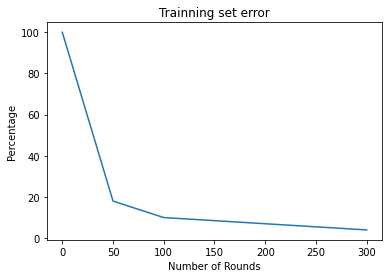

In [ ]:
import matplotlib.pyplot as plt

#x = rounds
"""y = list()
for i in acc:
  y.append(1-i)"""

x = [0,50,100,200,300]
y = [100, 18, 10, 7, 4]

plt.plot(x, y)

plt.xlabel('Number of Rounds')
plt.ylabel('Percentage')
plt.title('Trainning set error')
plt.show()